|Attribute|Description|
|:--|:--|
|battery_power|Battery Power in mAh|
|blue|Has BlueTooth or not|
|clock_speed|Microprocessor clock speed|
|dual_sim|The phone has dual sim support or not|
|fc|Front Camera Megapixels|
|four_g|Has 4G support or not|
|int_memory|Internal Memory in GigaBytes|
|m_dep|Mobile Depth in Cm|
|mobile_wt|Weight of Mobile Phone|
|n_cores|Number of cores in the processor|
|pc|Primary Camera Megapixels|
|px_height|Pixel Resolution height|
|px_width|Pixel resolution width|
|ram|RAM in MB|
|sc_h|Mobile screen height in cm|
|sc_w|Mobile screen width in cm|
|talk_time|Longest time after a single charge|
|three_g|3g or not|
|touch_screen|Has touch screen or not|
|wifi|Has wifi or not|
|price_range|Expected price range|

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [334]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [335]:
df=pd.read_csv('MobileTrain.csv')

In [336]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [337]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Data Preprocessing

##  Missing Values

In [338]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

    There is no missing values in the given data.

##  Outliers

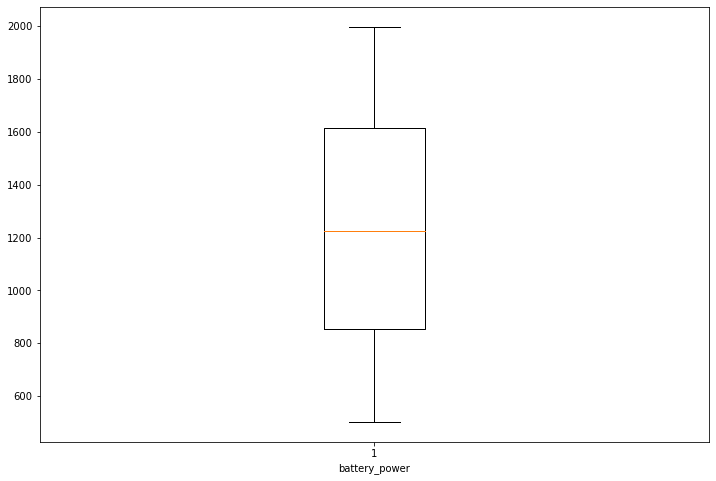

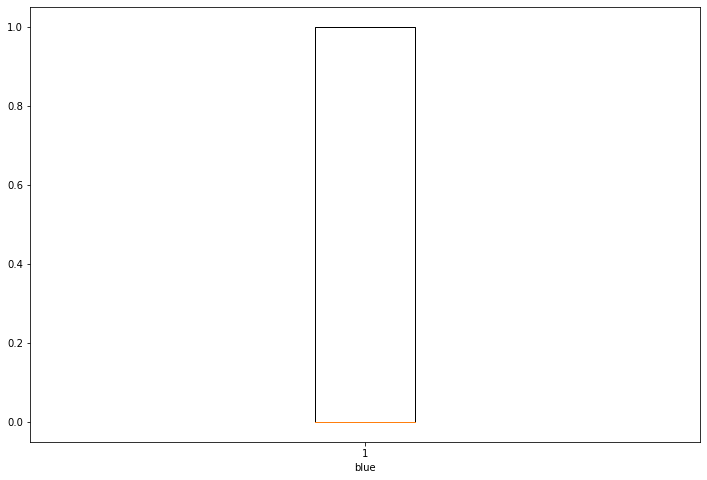

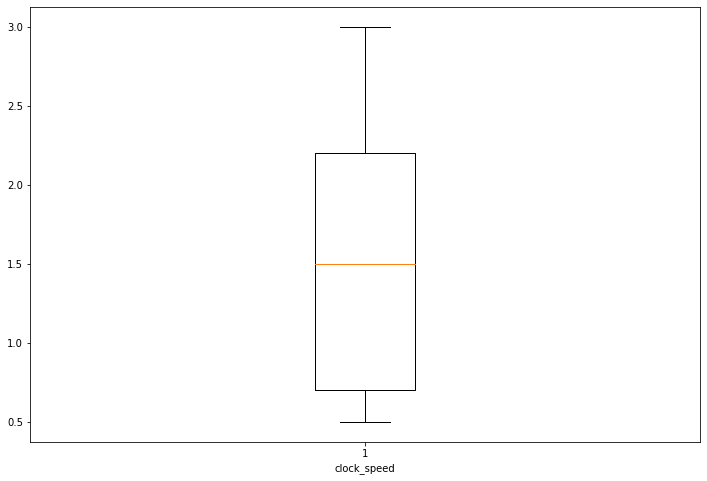

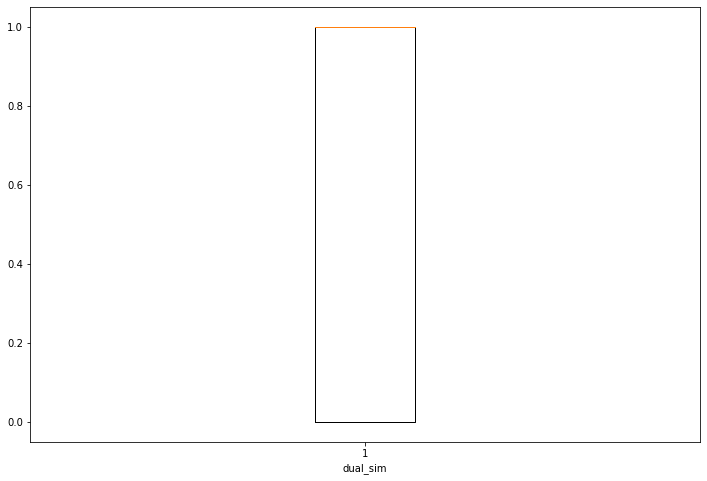

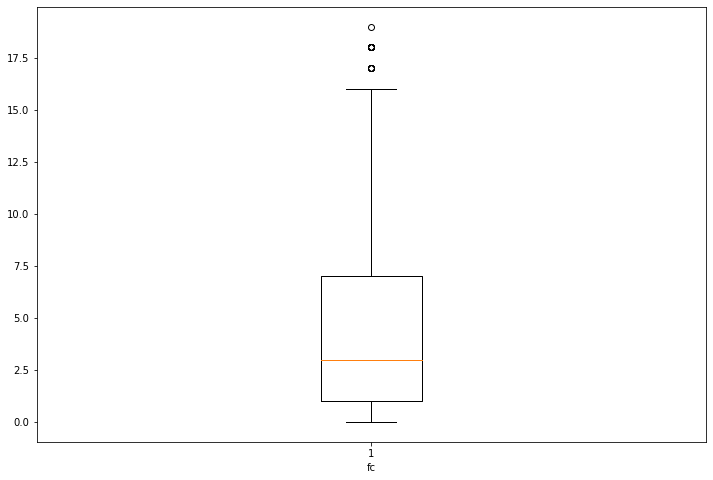

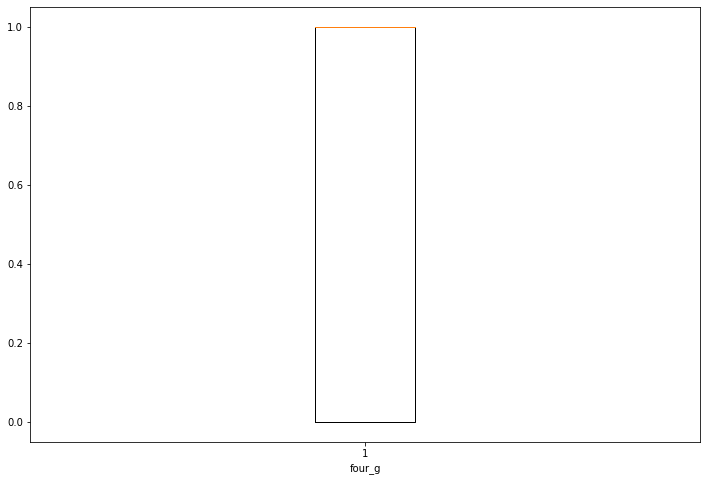

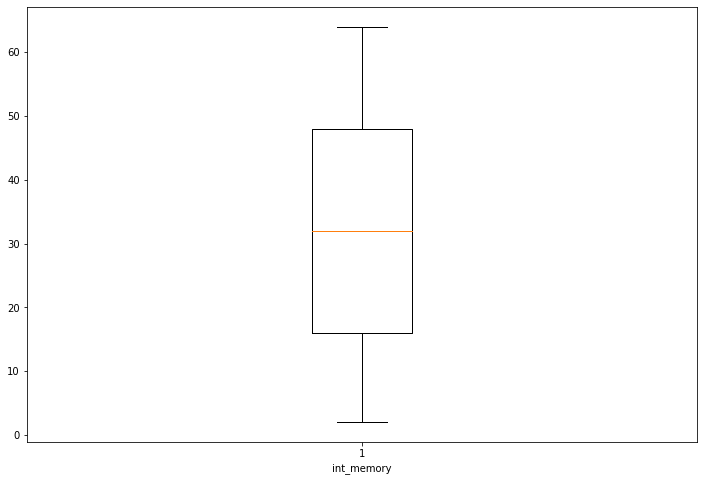

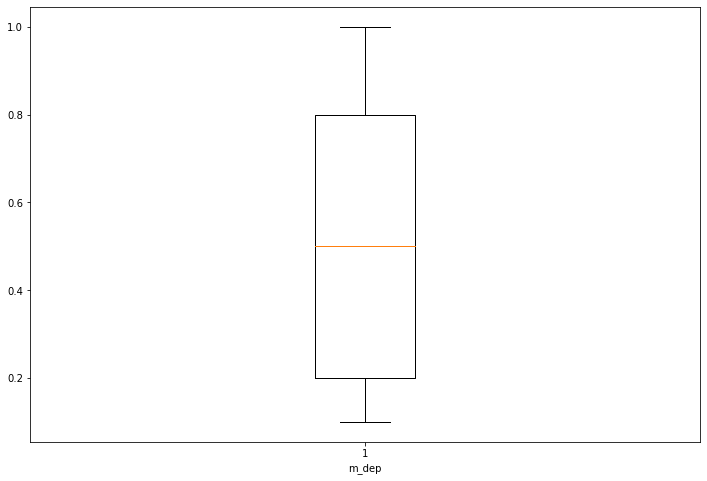

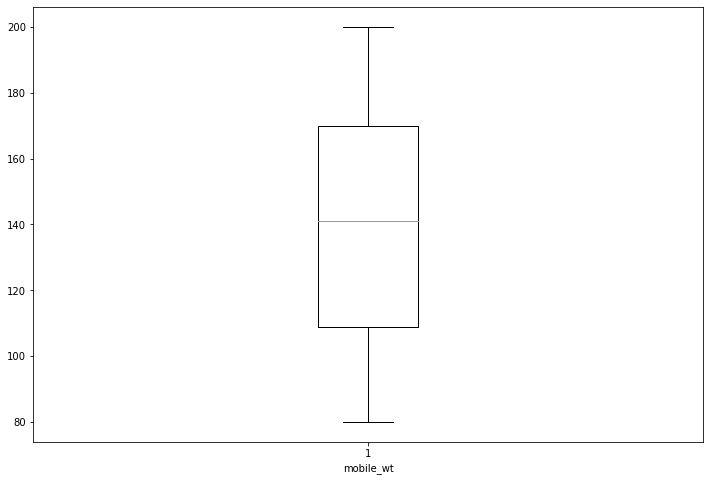

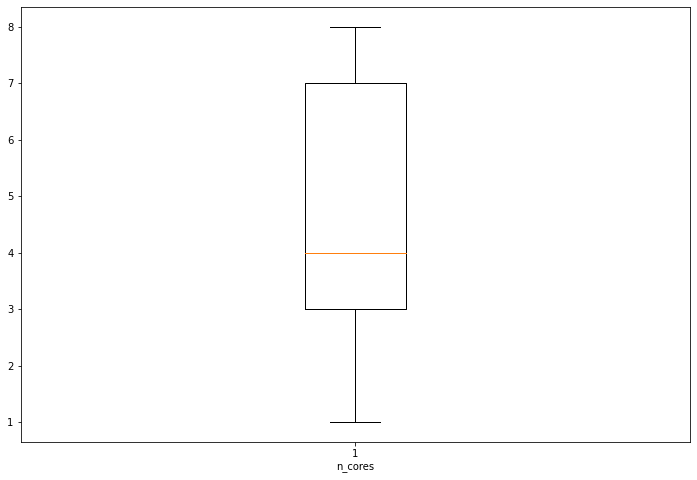

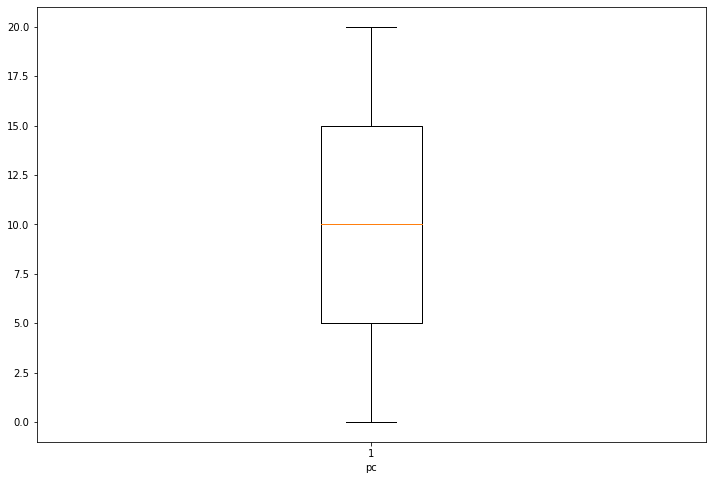

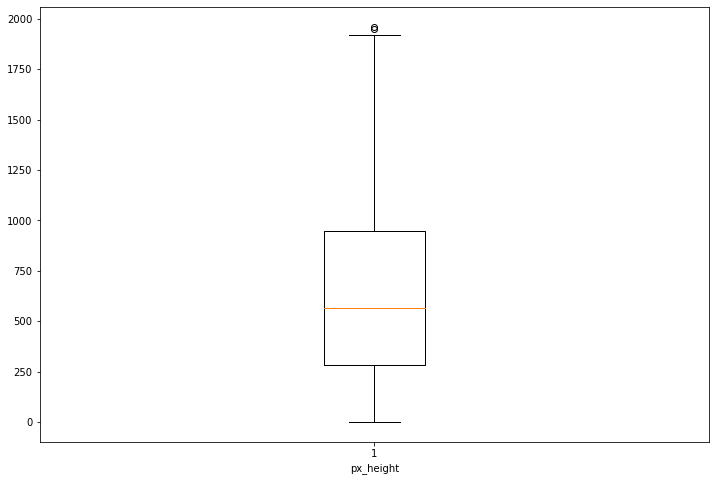

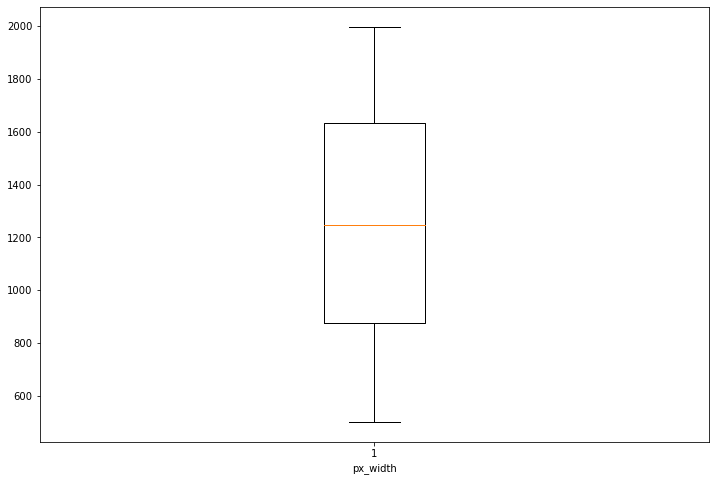

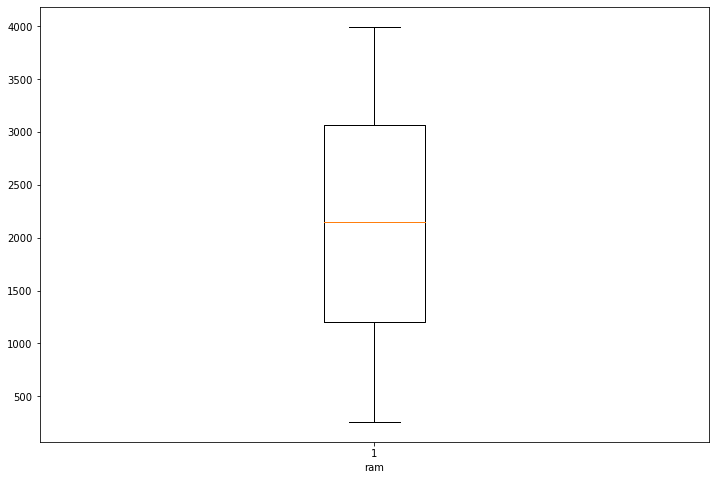

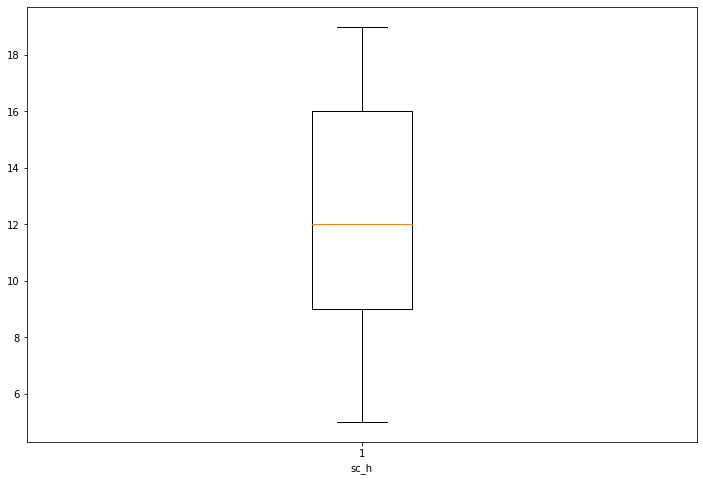

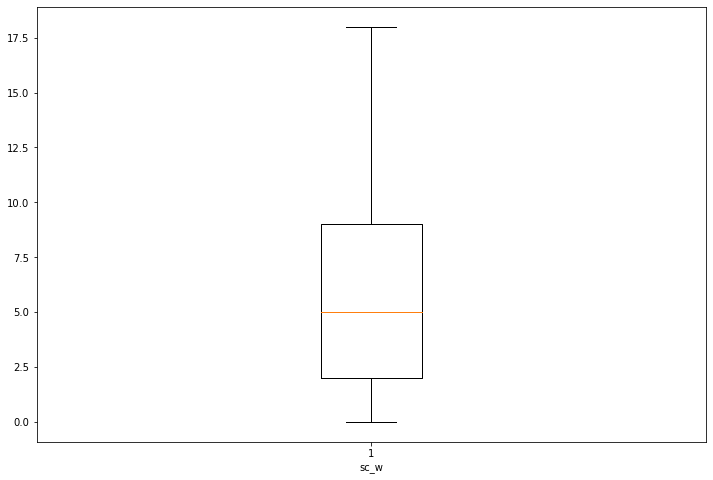

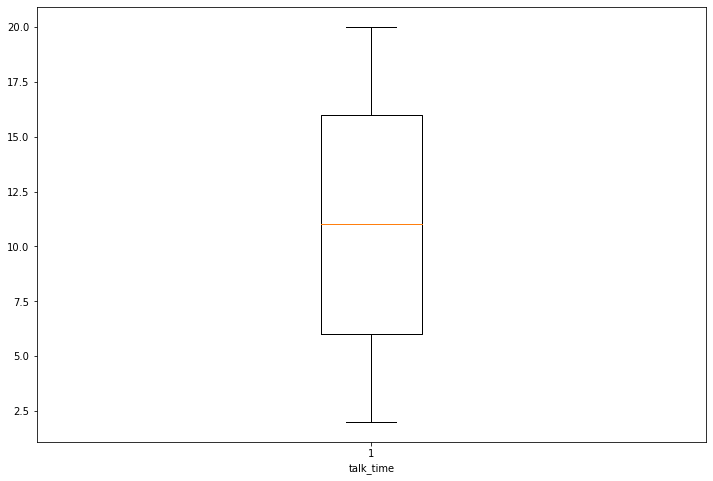

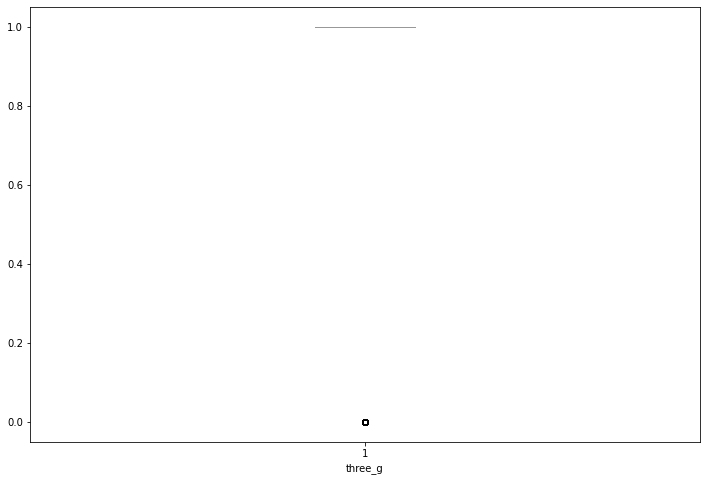

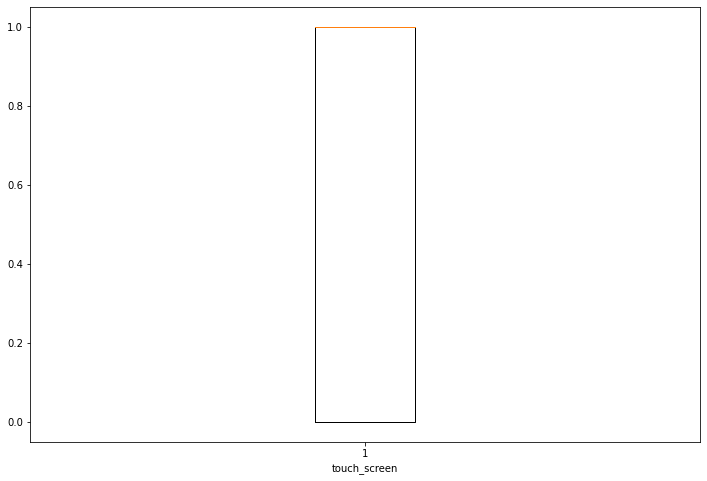

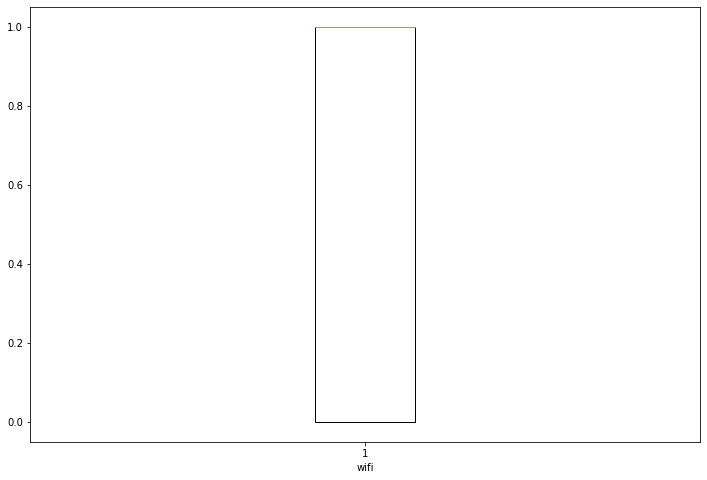

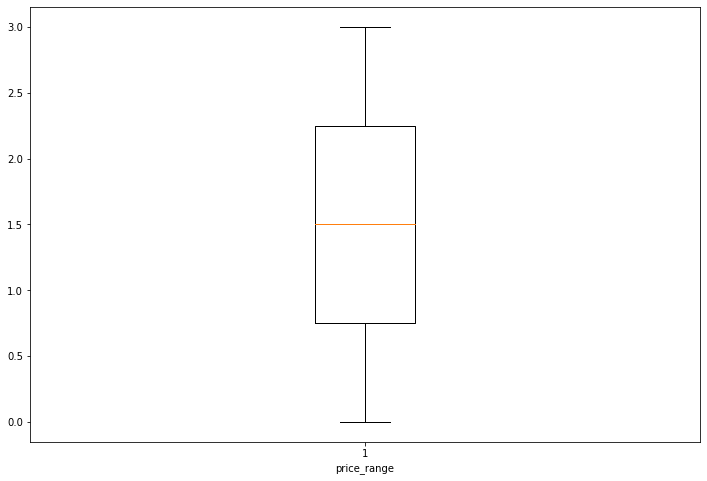

In [339]:
for f in df.columns:
    plt.figure(figsize=(12,8))
    plt.boxplot(df[f])
    plt.xlabel(f)
    plt.show()

In [340]:
for feature in df.columns:
    Q1 = np.percentile(df[feature],25,interpolation = 'midpoint')
    Q2 = np.percentile(df[feature],50,interpolation = 'midpoint')
    Q3 = np.percentile(df[feature],75,interpolation = 'midpoint')

    IQR = Q3-Q1
    lr = Q1 - (1.5*IQR)
    ur = Q3 + (1.5*IQR)
    outlier = []
    for x in df[feature]:
        if ((x < lr) or (x > ur)):
            outlier.append(x)
    print(feature)
  
    print('No:of outliers : ',len(outlier))
    

battery_power
No:of outliers :  0
blue
No:of outliers :  0
clock_speed
No:of outliers :  0
dual_sim
No:of outliers :  0
fc
No:of outliers :  18
four_g
No:of outliers :  0
int_memory
No:of outliers :  0
m_dep
No:of outliers :  0
mobile_wt
No:of outliers :  0
n_cores
No:of outliers :  0
pc
No:of outliers :  0
px_height
No:of outliers :  2
px_width
No:of outliers :  0
ram
No:of outliers :  0
sc_h
No:of outliers :  0
sc_w
No:of outliers :  0
talk_time
No:of outliers :  0
three_g
No:of outliers :  477
touch_screen
No:of outliers :  0
wifi
No:of outliers :  0
price_range
No:of outliers :  0


C:\Users\hp\AppData\Local\Temp/ipykernel_11436/3419527094.py:2: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

C:\Users\hp\AppData\Local\Temp/ipykernel_11436/3419527094.py:3: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)

C:\Users\hp\AppData\Local\Temp/ipykernel_11436/3419527094.py:4: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)



    There are outliers in fc, px_height and three_g 

In [341]:
df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

    We ignore this outlier since it is a categorical column.

In [342]:
df['px_height'].nunique()

1137

In [343]:
df['px_height'].value_counts()

347    7
179    6
371    6
275    6
674    5
      ..
87     1
648    1
341    1
993    1
483    1
Name: px_height, Length: 1137, dtype: int64

In [344]:
df['px_height'].describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

     We do not remove these outliers 

##  Encoding

In [345]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

    Since all the columns are numerical, we do not need encoding for this data.

In [346]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# EDA

## Univariate 

### Count Plot

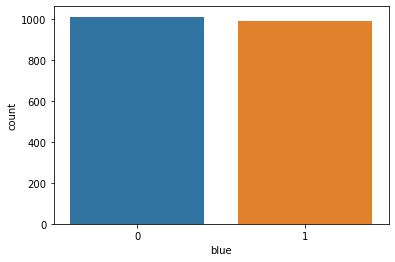

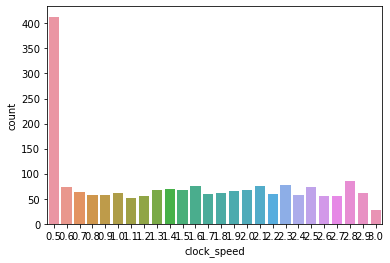

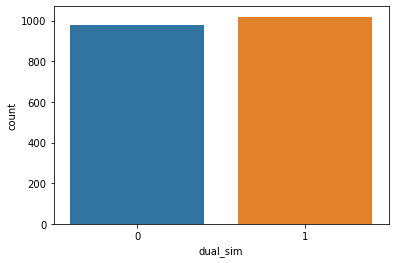

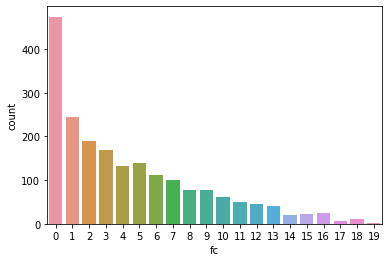

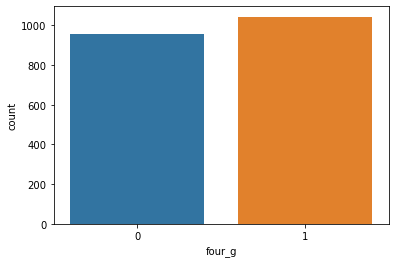

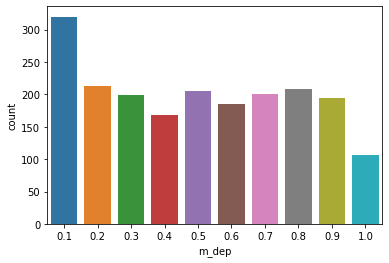

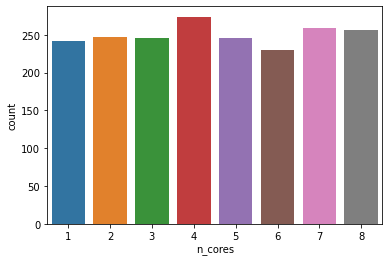

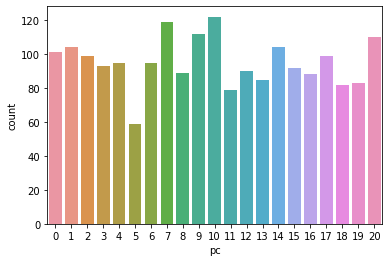

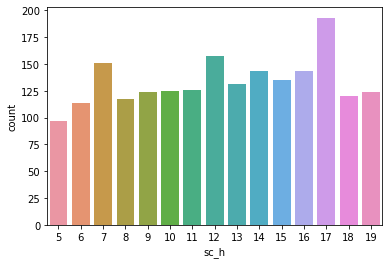

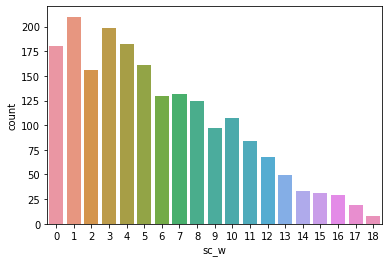

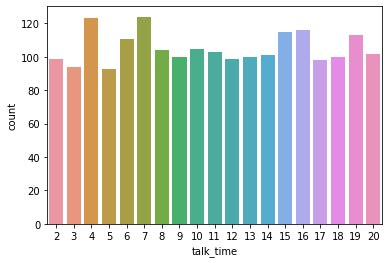

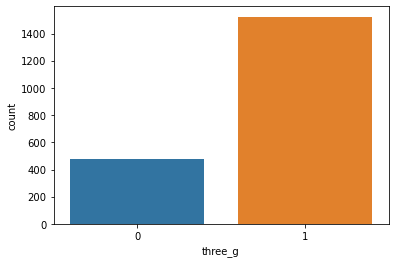

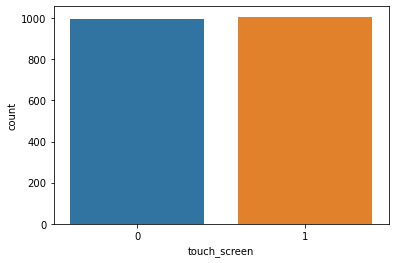

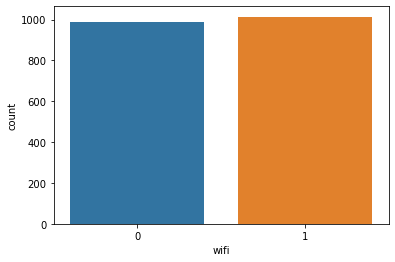

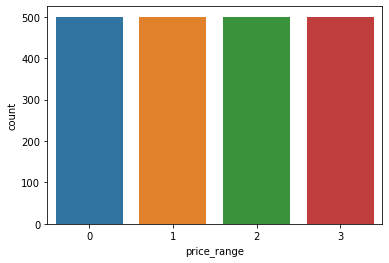

In [348]:
for column in df.columns:
    if (df[column].nunique())<=30:
        sns.countplot(x=df[column])
        plt.show()

    Inferences
    -  No of customers prefering bluetooth and not prefering are almost same.
    -  Most customers prefer to have a clock speed of 0.5.
    -  Count of customers prefering dual sim facility and not prefering them are almost same.
    -  Most of the customers didn't specify front camera megapixels, but among the specified ones 1 megapixel front cam              have high demand.
    -  More than half of the customers demanded 4G.
    -  More customers prefer slim phones than thick ones.
    -  Most customers prefer quad-core processor.
    -  Customer preference for primary camera is for 10 megapixels.
    -  Most prefered screen height is 17cm.
    -  Most customers prefer a screen width of 1cm, which is not possible.
    -  Customers prefer to have a battery life of at least 7 hours.
    -  Eventhough customers prefering 4G was almost same as those of not prefering them, almost 75% of the customers prefer          3G than those who don't want 3G.
    -  Touch screen preferability is almost same for customers who need it and who don't.
    -  WiFi preferability is also same for both cases.
    -  Customers prefer almost all kinds of phones in terms of price range.

### Dispersion Plot 

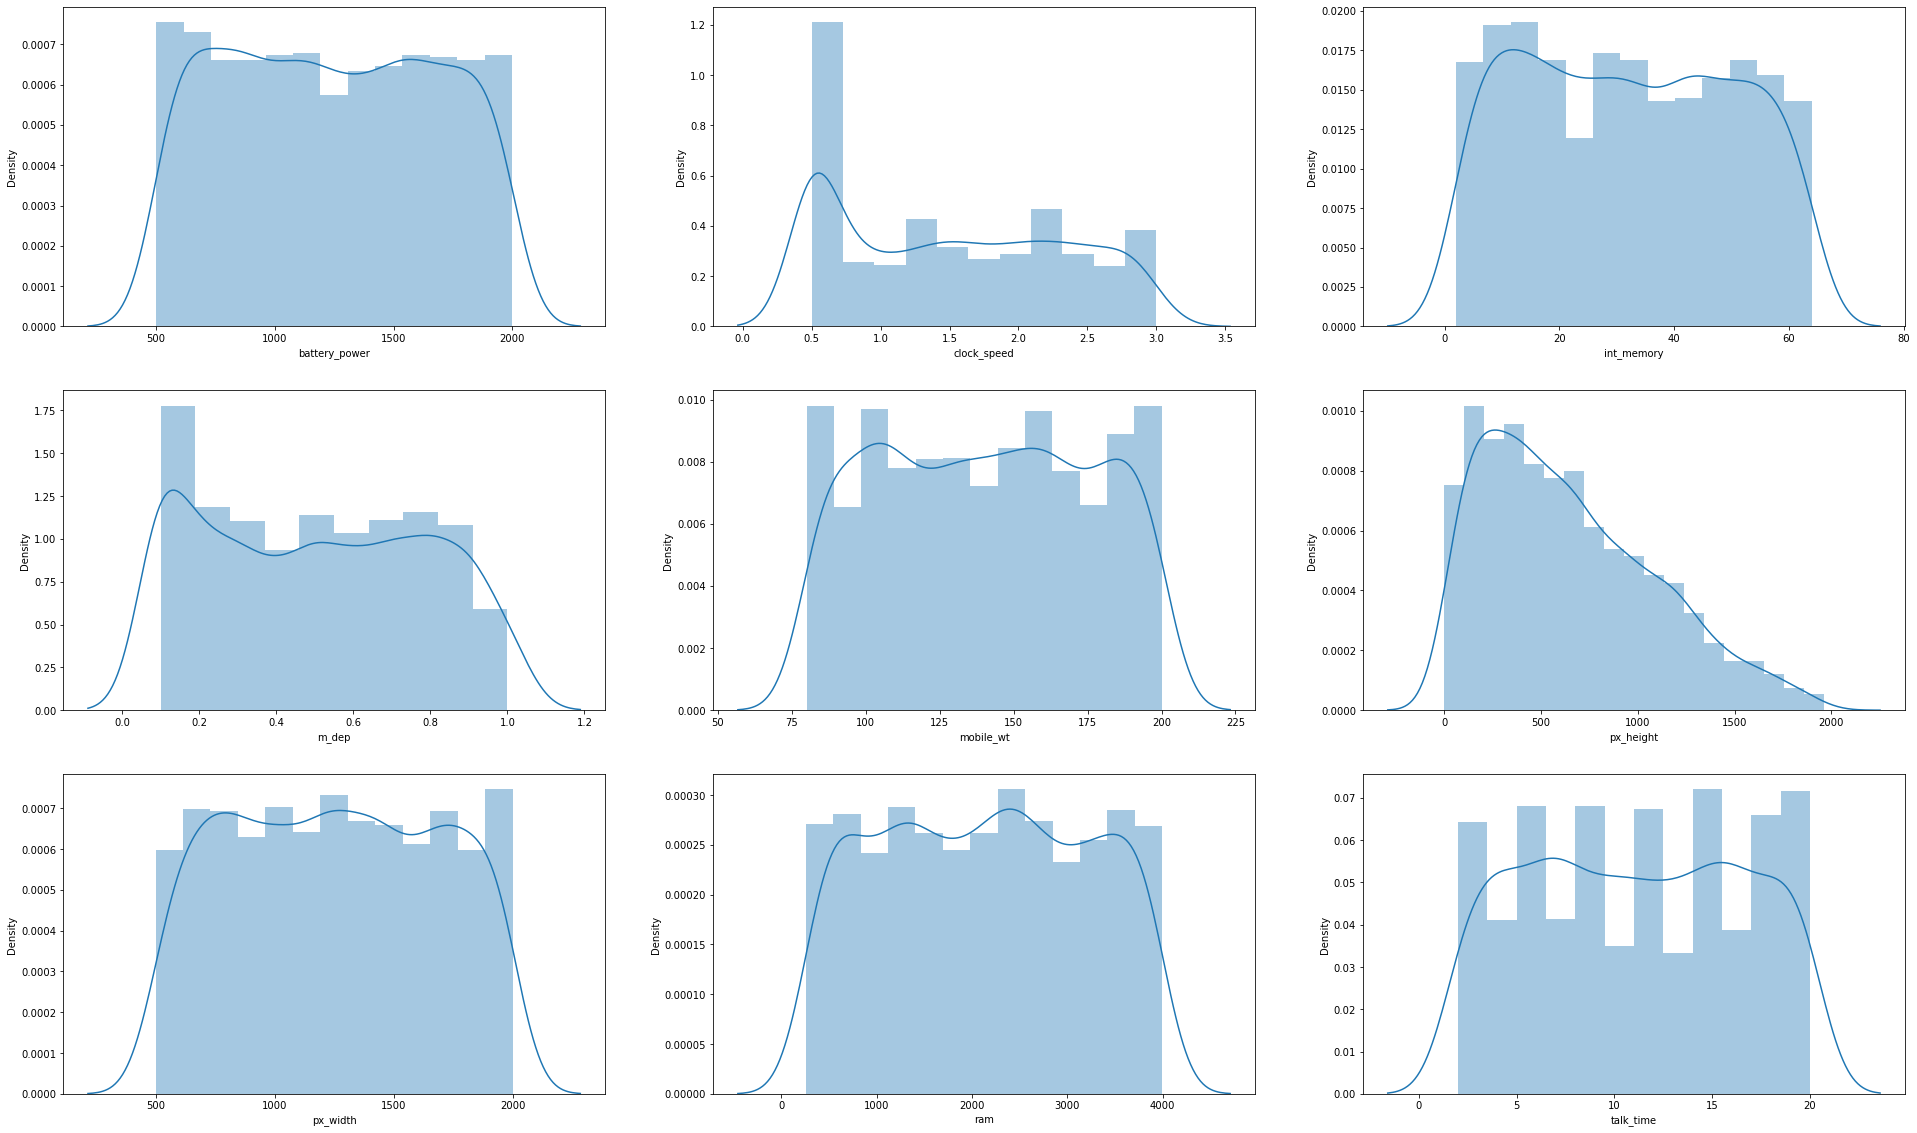

In [349]:
plt.figure(figsize = (33,20))
plt.subplot(331)
sns.distplot(df['battery_power'])
plt.subplot(332)
sns.distplot(df['clock_speed'])
plt.subplot(333)
sns.distplot(df['int_memory'])
plt.subplot(334)
sns.distplot(df['m_dep'])
plt.subplot(335)
sns.distplot(df['mobile_wt'])
plt.subplot(336)
sns.distplot(df['px_height'])
plt.subplot(337)
sns.distplot(df['px_width'])
plt.subplot(338)
sns.distplot(df['ram'])
plt.subplot(339)
sns.distplot(df['talk_time'])
plt.show()

    From the above distplots, we can see that all the 9 columns are not normal and px_height is right_skewed.

### Pie Chart

In [394]:
fig = plt.figure(figsize=(18,10), dpi=1600)
#2 rows 2 columns

#first row, first column
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.title('3G Vs No 3G')

#first row sec column
labels = ["4G-supported",'Not supported']
values=df['four_g'].value_counts().values
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.title('4G Vs No 4G')

#Second row first column
labels = ["supported",'Not supported']
values=df['wifi'].value_counts().values
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.title('Wifi Supported Vs Not Supported')

#second row second column
labels = ["supported",'Not supported']
values=df['blue'].value_counts().values
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.title('Bluetooth Supported Vs Not Supported')
plt.show()

- Most of the phones are 3G Supported
- Phone supporting 4G and not are Almost equal
- Phone supporting Wifi and not are Almost equal
- Phone supporting BlueTooth and not are Almost equal


## Bivariate Analysis

### Stacked Bar Charts

<AxesSubplot:xlabel='blue'>

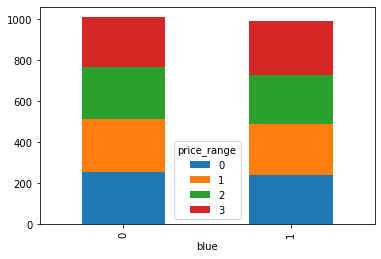

In [402]:
df.groupby(['blue','price_range']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='three_g'>

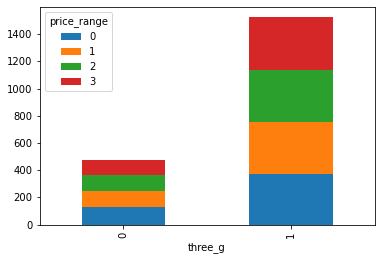

In [401]:
df.groupby(['three_g','price_range']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='four_g'>

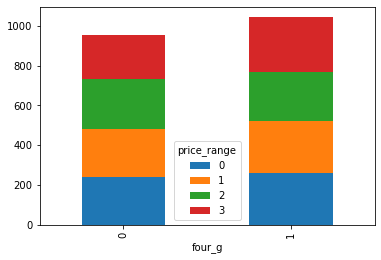

In [400]:
df.groupby(['four_g','price_range']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='wifi'>

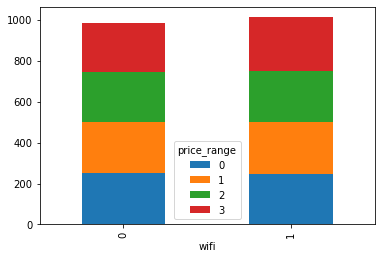

In [404]:
df.groupby(['wifi','price_range']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='price_range'>

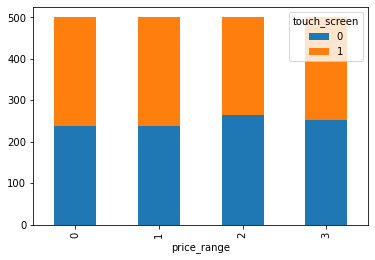

In [406]:
df.groupby(['price_range','touch_screen']).size().unstack().plot(kind='bar', stacked=True)

### Point plot

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

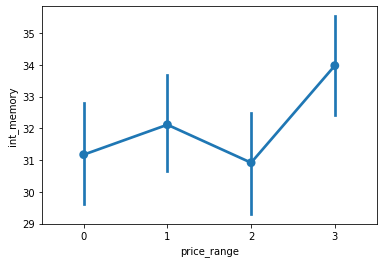

In [409]:
sns.pointplot(y="int_memory", x="price_range", data=df)

    We can see that internal memory gradually incresing for different price range from 0 to 3 however there is a dip after price level 1

### Box Plot

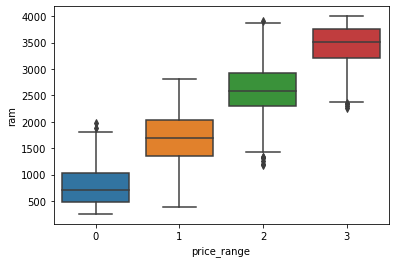

In [412]:
sns.boxplot(x = "price_range",y = "ram",data =df)
plt.show()

    We can see that ram gradually incresing for different price range from 0 to 3

### Violin Plot

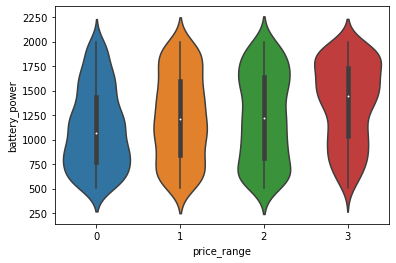

In [416]:
sns.violinplot(x = "price_range",y = "battery_power",data =df)
plt.show()

    There is a slight increase in battery power with varrying price range from 0 to 3

### Bar Plot

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

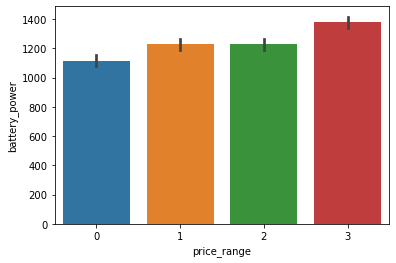

In [347]:
plt.figure()
sns.barplot(y="battery_power", x="price_range", data=df)

    From the above graph, we can see that as the battery power increases, the price range also increases.  

### Correlation Matrix

<AxesSubplot:>

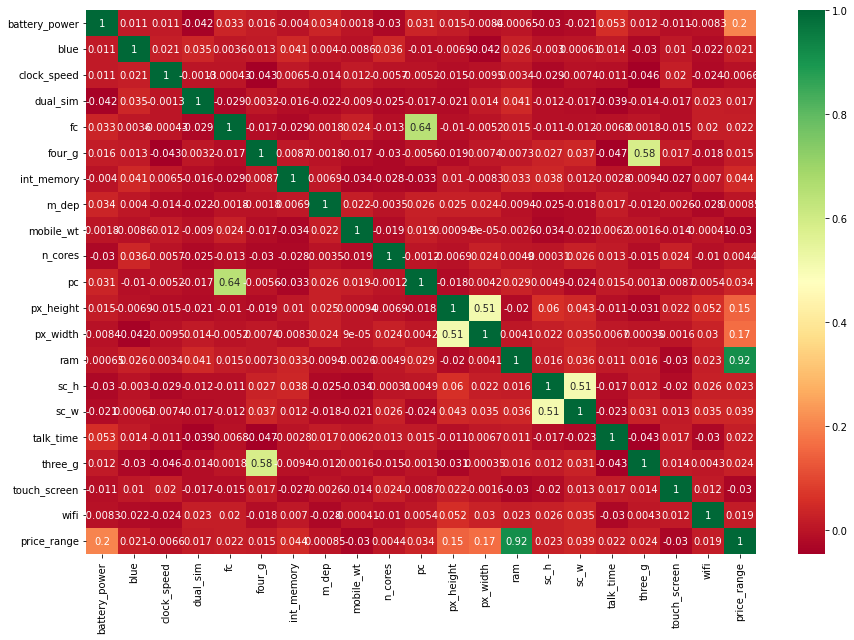

In [403]:
corrmax=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=corrmax, annot=True, cmap="RdYlGn")

    From the correlation matrix, we can see that ram and price_range are positively correlated.

# Separating Hardware and Software Features

In [352]:
hard = df.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','price_range']]
hard

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,0,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,1
1,1021,1,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,2
2,563,1,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,2
3,615,1,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,2
4,1821,1,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,0
1996,1965,1,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,2
1997,1911,0,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,3
1998,1512,0,0,4,1,46,0.1,145,5,5,336,670,869,18,10,0


In [353]:
soft = df.loc[:,['talk_time','three_g','wifi','touch_screen','clock_speed']]
soft

,talk_time,three_g,wifi,touch_screen,clock_speed
0,19,0,1,0,2.2
1,7,1,0,1,0.5
2,9,1,0,1,0.5
3,11,1,0,0,2.5
4,15,1,0,1,1.2
...,...,...,...,...,...
1995,19,1,0,1,0.5
1996,16,1,1,1,2.6
1997,5,1,0,1,0.9
1998,19,1,1,1,0.9


# Merging

In [354]:
data = pd.concat([hard, soft], axis=1)
data

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,price_range,talk_time,three_g,wifi,touch_screen,clock_speed
0,842,0,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,1,19,0,1,0,2.2
1,1021,1,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,2,7,1,0,1,0.5
2,563,1,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,2,9,1,0,1,0.5
3,615,1,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,2,11,1,0,0,2.5
4,1821,1,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,1,15,1,0,1,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,...,1890,668,13,4,0,19,1,0,1,0.5
1996,1965,1,1,0,0,39,0.2,187,4,3,...,1965,2032,11,10,2,16,1,1,1,2.6
1997,1911,0,1,1,1,36,0.7,108,8,3,...,1632,3057,9,1,3,5,1,0,1,0.9
1998,1512,0,0,4,1,46,0.1,145,5,5,...,670,869,18,10,0,19,1,1,1,0.9


# Ranking

    Ranking can be done in many ways.
    1. Rank the entire dataset. But, it is hard to interpret this method.
    2. Rank with respect to a column.
    3. Rank multiple columns.

### Rank the entire dataset

In [355]:
data.rank(axis=1,ascending=False)

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,price_range,talk_time,three_g,wifi,touch_screen,clock_speed
0,2.0,19.0,19.0,14.0,19.0,8.5,16.0,4.0,11.5,11.5,...,3.0,1.0,7.0,8.5,14.0,6.0,19.0,14.0,19.0,10.0
1,3.0,15.0,15.0,20.5,15.0,6.0,18.0,5.0,10.5,9.0,...,2.0,1.0,7.0,10.5,12.0,8.0,15.0,20.5,15.0,19.0
2,4.0,16.0,16.0,12.0,16.0,6.0,19.0,5.0,10.0,9.0,...,2.0,1.0,7.0,12.0,12.0,8.0,16.0,21.0,16.0,20.0
3,4.0,14.5,19.0,19.0,19.0,8.0,16.0,5.0,11.0,9.0,...,2.0,1.0,6.0,10.0,13.0,7.0,14.5,19.0,19.0,12.0
4,1.0,16.0,20.5,9.0,16.0,6.0,19.0,5.0,11.5,8.0,...,3.0,2.0,10.0,11.5,16.0,7.0,16.0,20.5,16.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3.0,14.0,14.0,20.0,14.0,11.0,17.0,5.0,9.0,7.0,...,1.0,4.0,8.0,10.0,20.0,6.0,14.0,20.0,14.0,18.0
1996,2.5,16.0,16.0,20.5,20.5,6.0,19.0,5.0,10.0,11.0,...,2.5,1.0,8.0,9.0,13.0,7.0,16.0,16.0,16.0,12.0
1997,2.0,20.5,14.5,14.5,14.5,6.0,19.0,5.0,8.0,10.5,...,3.0,1.0,7.0,14.5,10.5,9.0,14.5,20.5,14.5,18.0
1998,1.0,20.0,20.0,12.0,14.5,6.0,18.0,5.0,10.5,10.5,...,3.0,2.0,8.0,9.0,20.0,7.0,14.5,14.5,14.5,17.0


### Rank the price_range column

In [356]:
data1 = data
data1["rank_by_price"] = data1["price_range"].rank()
data1.sort_values(by=["rank_by_price"])

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,ram,sc_h,sc_w,price_range,talk_time,three_g,wifi,touch_screen,clock_speed,rank_by_price
1838,720,1,1,12,1,14,0.8,165,4,14,...,1086,14,7,0,3,1,0,1,0.9,250.5
1762,808,1,1,3,0,46,0.5,105,8,15,...,1082,15,5,0,10,1,1,0,0.5,250.5
419,914,1,0,2,0,4,0.8,100,2,12,...,808,11,7,0,5,1,0,1,0.9,250.5
846,1489,0,1,8,0,32,0.6,200,1,16,...,776,7,6,0,8,0,0,0,2.4,250.5
845,1907,0,0,13,0,55,0.9,105,7,15,...,286,14,4,0,17,1,1,0,2.0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,1,0,1,58,0.2,100,8,0,...,3863,17,12,3,9,1,1,1,2.8,1750.5
982,1035,0,1,2,1,44,0.5,99,3,3,...,3506,14,5,3,12,1,0,1,0.6,1750.5
987,1688,0,0,0,1,21,0.2,170,7,0,...,3984,17,14,3,8,1,1,1,2.5,1750.5
956,862,0,0,9,1,6,0.1,107,8,14,...,3458,9,4,3,9,1,1,1,2.3,1750.5


### Ranking each column seperately to clear the output

In [357]:
b = data
b["rank_by_price"] = b["price_range"].rank()
b["rank_by_battery"] = b["battery_power"].rank(ascending=False)
b["rank_by_blueooth"] = b["blue"].rank(ascending=False)
b["rank_by_clockspeed"] = b["clock_speed"].rank(ascending=False)
b["rank_by_DualSIM"] = b["dual_sim"].rank(ascending=False)
b["rank_by_fc"] = b["fc"].rank(ascending=False)
b["rank_by_4G"] = b["four_g"].rank(ascending=False)
b["rank_by_InternalMemory"] = b["int_memory"].rank(ascending=False)
b["rank_by_mdep"] = b["m_dep"].rank(ascending=False)
b["rank_by_weight"] = b["mobile_wt"].rank(ascending=True)
b["rank_by_ncores"] = b["n_cores"].rank(ascending=False)
b["rank_by_pc"] = b["pc"].rank(ascending=False)
b["rank_by_height"] = b["px_height"].rank(ascending=False)
b["rank_by_width"] = b["px_width"].rank(ascending=False)
b["rank_by_ram"] = b["ram"].rank(ascending=False)
b["rank_by_sch"] = b["sc_h"].rank(ascending=False)
b["rank_by_scw"] = b["sc_w"].rank(ascending=False)
b["rank_by_talktime"] = b["talk_time"].rank(ascending=False)
b["rank_by_3G"] = b["three_g"].rank(ascending=False)
b["rank_by_touchscreen"] = b["touch_screen"].rank(ascending=False)
b["rank_by_wifi"] = b["wifi"].rank(ascending=False)
b.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,0,1,0,7,0.6,188,2,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,1,0,1,53,0.7,136,3,6,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,1,2,1,41,0.9,145,5,6,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,0,0,0,10,0.8,131,6,9,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,0,13,1,44,0.6,141,2,14,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


# Modelling

### Separating input and output columns

In [358]:
X = df.drop(['price_range'], axis=1)
y = df['price_range']

### Scaling

In [359]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)

### Splitting the train dataset

In [360]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [361]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

## Logistic Regression

In [362]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train , y_train)
y_pred = logit_model.predict(X_test)
lg_result = classification_report(y_pred,y_test,output_dict=True)
lg_result = pd.DataFrame(lg_result).transpose()
lg_result.style.background_gradient(cmap="BuPu")

,precision,recall,f1-score,support
0,0.962121,0.984496,0.973180,129.000000
1,0.983051,0.920635,0.950820,126.000000
2,0.908333,0.990909,0.947826,110.000000
3,0.992308,0.955556,0.973585,135.000000
accuracy,0.962000,0.962000,0.962000,0.962000
macro avg,0.961453,0.962899,0.961353,500.000000
weighted avg,0.963712,0.962000,0.962077,500.000000


In [363]:
print(accuracy_score(y_test, y_pred))

0.962


In [364]:
print(f1_score(y_test, y_pred,average='weighted'))

0.9619233191940991


In [365]:
print(recall_score(y_test, y_pred,average='weighted'))


0.962


In [366]:
precision_score(y_test, y_pred,average='weighted')

0.9634394442766536

In [367]:
Accuracy  = []
F1_score  = []
Recall    = []
Precision = []

In [368]:
Accuracy.append(accuracy_score(y_test, y_pred))
F1_score.append(f1_score(y_test, y_pred,average='weighted'))
Recall.append(recall_score(y_test, y_pred,average='weighted'))
Precision.append(precision_score(y_test, y_pred,average='weighted'))

In [369]:
report_all = pd.DataFrame({'Model':['LR'],'Accuracy_Score':Accuracy,'F1_Score':F1_score,'Recall_Score':Recall,'Precision_Score':Precision})
report_all 

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LR,0.962,0.961923,0.962,0.963439


## SVC

In [370]:
from sklearn.svm import SVC

SV=SVC()
SV.fit(X_train,y_train)
y_pred=SV.predict(X_test)
SVM_result = classification_report(y_pred2,y_test,output_dict=True)
SVM_result = pd.DataFrame(SVM_result).transpose()
SVM_result.style.background_gradient(cmap="BuPu")

,precision,recall,f1-score,support
0,0.893939,0.921875,0.907692,128.000000
1,0.847458,0.763359,0.803213,131.000000
2,0.800000,0.842105,0.820513,114.000000
3,0.923077,0.944882,0.933852,127.000000
accuracy,0.868000,0.868000,0.868000,0.868000
macro avg,0.866118,0.868055,0.866318,500.000000
weighted avg,0.867744,0.868000,0.867086,500.000000


In [371]:
Accuracy.append(accuracy_score(y_test, y_pred))
F1_score.append(f1_score(y_test, y_pred,average='weighted'))
Recall.append(recall_score(y_test, y_pred,average='weighted'))
Precision.append(precision_score(y_test, y_pred,average='weighted'))

## Decision Tree

In [372]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
DT_result = classification_report(y_pred1,y_test,output_dict=True)
DT_result = pd.DataFrame(DT_result).transpose()
DT_result.style.background_gradient(cmap="BuPu")

,precision,recall,f1-score,support
0,0.886364,0.893130,0.889734,131.000000
1,0.779661,0.754098,0.766667,122.000000
2,0.725000,0.776786,0.750000,112.000000
3,0.900000,0.866667,0.883019,135.000000
accuracy,0.826000,0.826000,0.826000,0.826000
macro avg,0.822756,0.822670,0.822355,500.000000
weighted avg,0.827865,0.826000,0.826592,500.000000


In [373]:
Accuracy.append(accuracy_score(y_test, y_pred))
F1_score.append(f1_score(y_test, y_pred,average='weighted'))
Recall.append(recall_score(y_test, y_pred,average='weighted'))
Precision.append(precision_score(y_test, y_pred,average='weighted'))

## Random Forest

In [374]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train,y_train) 
y_pred = RF.predict(X_test)
RF_result = classification_report(y_pred3,y_test,output_dict=True)
RF_result = pd.DataFrame(RF_result).transpose()
RF_result.style.background_gradient(cmap="BuPu")


,precision,recall,f1-score,support
0,0.946970,0.939850,0.943396,133.000000
1,0.881356,0.838710,0.859504,124.000000
2,0.783333,0.810345,0.796610,116.000000
3,0.876923,0.897638,0.887160,127.000000
accuracy,0.874000,0.874000,0.874000,0.874000
macro avg,0.872146,0.871635,0.871668,500.000000
weighted avg,0.874942,0.874000,0.874253,500.000000


In [375]:
Accuracy.append(accuracy_score(y_test, y_pred))
F1_score.append(f1_score(y_test, y_pred,average='weighted'))
Recall.append(recall_score(y_test, y_pred,average='weighted'))
Precision.append(precision_score(y_test, y_pred,average='weighted'))

## Gradient Boosting Classifier

In [376]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
model = GB.fit(X_train,y_train)
y_pred = model.predict(X_test)
GB_result = classification_report(y_pred4,y_test,output_dict=True)
GB_result = pd.DataFrame(GB_result).transpose()
GB_result.style.background_gradient(cmap="BuPu")

,precision,recall,f1-score,support
0,0.931818,0.938931,0.935361,131.000000
1,0.872881,0.837398,0.854772,123.000000
2,0.816667,0.844828,0.830508,116.000000
3,0.915385,0.915385,0.915385,130.000000
accuracy,0.886000,0.886000,0.886000,0.886000
macro avg,0.884188,0.884135,0.884007,500.000000
weighted avg,0.886332,0.886000,0.886016,500.000000


In [377]:
Accuracy.append(accuracy_score(y_test, y_pred))
F1_score.append(f1_score(y_test, y_pred,average='weighted'))
Recall.append(recall_score(y_test, y_pred,average='weighted'))
Precision.append(precision_score(y_test, y_pred,average='weighted'))

## XGBClassifier

In [378]:
from xgboost import XGBClassifier

xgb= XGBClassifier()
xgb_model = xgb.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
xgb_result = classification_report(y_pred,y_test,output_dict=True)
xgb_result = pd.DataFrame(xgb_result).transpose()
xgb_result.style.background_gradient(cmap="BuPu")



,precision,recall,f1-score,support
0,0.946970,0.932836,0.939850,134.000000
1,0.872881,0.837398,0.854772,123.000000
2,0.808333,0.850877,0.829060,114.000000
3,0.915385,0.922481,0.918919,129.000000
accuracy,0.888000,0.888000,0.888000,0.888000
macro avg,0.885892,0.885898,0.885650,500.000000
weighted avg,0.888986,0.888000,0.888260,500.000000


In [379]:
Accuracy.append(accuracy_score(y_test, y_pred))
F1_score.append(f1_score(y_test, y_pred,average='weighted'))
Recall.append(recall_score(y_test, y_pred,average='weighted'))
Precision.append(precision_score(y_test, y_pred,average='weighted'))

## Comparision

In [380]:
report_all = pd.DataFrame({'Model':['LR','SVM','DT','RF','GB','XGB'],'Accuracy_Score':Accuracy,'F1_Score':F1_score,'Recall_Score':Recall,'Precision_Score':Precision})
report_all 

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,LR,0.962,0.961923,0.962,0.963439
1,SVM,0.868,0.868914,0.868,0.871302
2,DT,0.818,0.818331,0.818,0.819057
3,RF,0.872,0.871532,0.872,0.871298
4,GB,0.886,0.885984,0.886,0.886262
5,XGB,0.888,0.887740,0.888,0.887950


    Logistic regression is giving the best results Hence proceeding with Logistic regression.

# Loading the test dataset

In [381]:
test = pd.read_csv('MobileTest.csv')

In [382]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


## Predict the price_range of test dataset

In [383]:
test['price_range'] = DT.predict(test.drop('id', axis=1))

In [384]:
test.sort_values(by=['price_range'])

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,2
582,583,652,0,0.5,0,6,0,3,0.6,193,...,1036,1345,2807,19,17,13,1,0,1,2
583,584,1422,1,2.8,0,7,0,30,0.5,99,...,207,1038,2229,15,5,15,1,0,1,2
584,585,709,0,1.9,1,10,0,63,0.3,150,...,345,601,1509,7,2,7,1,1,0,2
586,587,941,0,1.3,1,3,0,26,0.4,128,...,994,1494,2875,6,3,11,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,768,1,0.5,1,1,0,45,0.1,175,...,1164,1376,3947,6,1,12,1,1,0,3
195,196,1202,0,0.8,0,2,0,49,0.5,131,...,197,1435,1177,15,13,7,1,1,1,3
196,197,885,0,0.5,1,2,0,3,0.5,163,...,813,1666,2887,5,1,13,0,0,1,3
298,299,1430,1,2.0,1,0,1,16,0.2,171,...,696,757,2916,6,3,10,1,1,0,3


In [385]:
test['price_range'].nunique()

2

In [386]:
df['price_range'].nunique()

4

In [387]:
df.to_csv("ready_to_model.csv")